# 1. Introduction to Quantum Gates: Building Basic Quantum Circuits

In this notebook we:

- Briefly review **quantum bits (qubits)**, **quantum gates**, and **quantum circuits**.
- Design simple circuits using **Hadamard (H)**, **Pauli-X (X)**, and **CNOT** gates.
- Use Qiskit to **simulate** these circuits and observe:
  - Single-qubit **superposition**,
  - The effect of the **Pauli-X** gate,
  - Two-qubit **entanglement** (Bell state).
- Summarize the observed measurement results.


In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

%matplotlib inline

# Initialize simulator
sim = AerSimulator()

## Part A: Single-Qubit Superposition (Hadamard Gate)


We apply a Hadamard gate to create the superposition

H|0> = |+> =  (|0> + |1>) / sqrt(2)

To visualize the Bloch sphere state after applying the Hadamard gate, before running the full simulation.

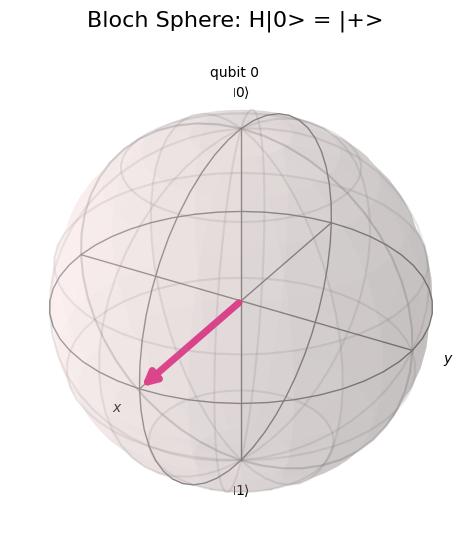

In [14]:
# Bloch sphere BEFORE measurement (pure |+> state)
qc_super_nom = QuantumCircuit(1)
qc_super_nom.h(0)
sv_super = Statevector.from_instruction(qc_super_nom)
plot_bloch_multivector(sv_super, title="Bloch Sphere: H|0> = |+>")
plt.show()

From the Bloch sphere we see θ = π/2 and φ = π/2, placing the state on the +X axis. This confirms that applying the Hadamard gate to |0⟩ produces the |+⟩ state.

Then we measure many shots, and check that 0 and 1 appear with almost equal probability.

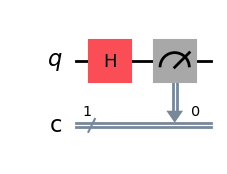

Superposition counts (H|0>): {'0': 2069, '1': 2027}


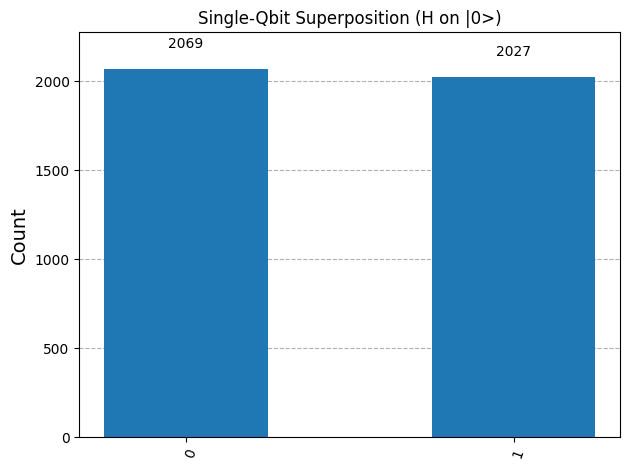

In [18]:
# Circuit: H on |0>, then measure
qc_super = QuantumCircuit(1, 1)
qc_super.h(0)
qc_super.measure(0, 0)

qc_super.draw("mpl")
plt.show()

# Simulate many shots
result_super = sim.run(qc_super, shots=4096).result()

counts_super = result_super.get_counts()
print("Superposition counts (H|0>):", counts_super)

plot_histogram(counts_super, title="Single-Qbit Superposition (H on |0>)")
plt.show()



## Part B: Pauli-X Gate (Bit Flip)

The Pauli-X gate acts like a quantum NOT:

The Pauli-X gate flips the Qubit state:

X |0> = |1>
X |1> = |0>

We apply the X gate to |0> and observe that the measurement result is always 1.

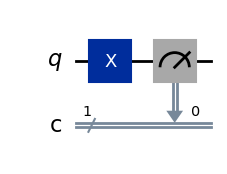

Pauli-X counts (X|0>): {'1': 1024}


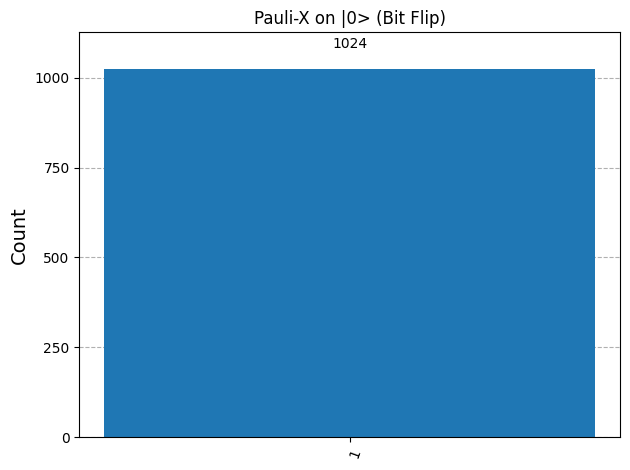

In [19]:
# Circuit: X on |0>, then measure
qc_x = QuantumCircuit(1, 1)
qc_x.x(0)
qc_x.measure(0, 0)

qc_x.draw("mpl")
plt.show()

result_x = sim.run(qc_x, shots=1024).result()
counts_x = result_x.get_counts()
print("Pauli-X counts (X|0>):", counts_x)

plot_histogram(counts_x, title="Pauli-X on |0> (Bit Flip)")
plt.show()

## Part C: Two-Qubit Entanglement with H + CNOT (Bell State)

We create the Bell state:

|B00>  =  ( |00> + |11> ) / sqrt(2)

using the following circuit:

1. Start from the initial state |00>.
2. Apply a Hadamard gate to qubit 0.  
   This produces the superposition ( |00> + |10> ) / sqrt(2).
3. Apply a CNOT gate with qubit 0 as control and qubit 1 as target.  
   This creates the entangled state ( |00> + |11> ) / sqrt(2).

Finally, we measure the circuit many times.  
The results show only `00` and `11`, demonstrating the strong correlations expected from an entangled Bell state.


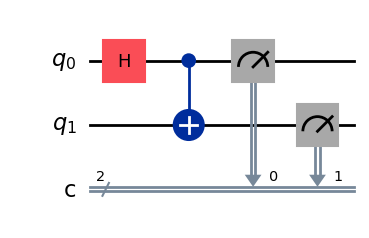

Bell-state counts: {'00': 2036, '11': 2060}


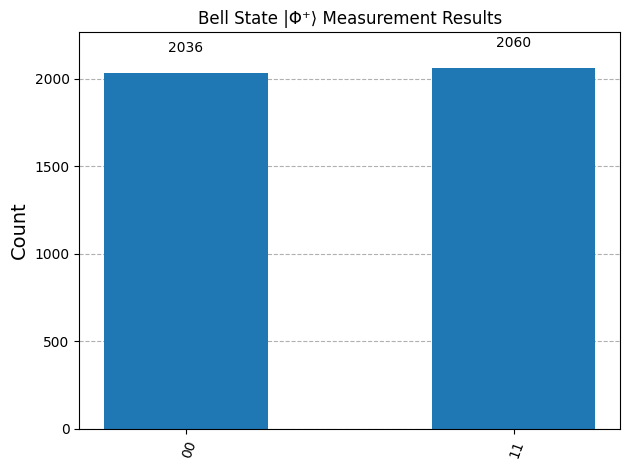

In [23]:
# Bell-state circuit
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.measure([0, 1], [0, 1])

qc_bell.draw("mpl")
plt.show()

result_bell = sim.run(qc_bell, shots=4096).result()
counts_bell = result_bell.get_counts()
print("Bell-state counts:", counts_bell)

plot_histogram(counts_bell, title="Bell State |Φ⁺⟩ Measurement Results")
plt.show()

## Summary of Results

- **Hadamard (H) on |0>**  
  - Measurement results ~50% `0` and ~50% `1`.  
  - Confirms superposition.

- **Pauli-X (X) on |0>**  
  - Measurement results ~100% `1`.  
  - Confirms bit-flip.

- **H + CNOT (Bell state)**  
  - Measurements produce only `00` and `11` with ~50% each.  
  - Confirms entanglement: individual qubits are random but perfectly correlated.
